In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Unemployment in India.csv')

In [3]:
# Check the structure of the dataset to understand its columns and data types.
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
# Check for and address any missing data
print(df.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [11]:
# Drop rows where all values are missing
df = df.dropna(how='all')
print(df.isnull().sum())  # Verify no missing values remain

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


In [13]:
# Rename columns for easier access (e.g., remove spaces)
df.columns = ['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed', 'Labour_Participation_Rate', 'Area']
df.head(5)

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [19]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.head()

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [15]:
# Ensure there are no duplicate entries
df = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows after removing duplicates: 740


In [17]:
# Ensure the Area column has consistent values (e.g., 'Rural' or 'Urban') and check for any inconsistencies in Region or Frequency.
print(df['Area'].unique())
print(df['Region'].unique())
print(df['Frequency'].unique())

['Rural' 'Urban']
['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']
[' Monthly' 'Monthly']


# Exploratory Data Analysis (EDA)

In [24]:
# Compute basic statistics to understand the distribution of unemployment rates, employment numbers, and labor participation rates.

df.describe()

,Date,Unemployment_Rate,Employed,Labour_Participation_Rate
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


In [26]:
# Group by Region and Area: Analyze unemployment rates by region and area (Rural vs. Urban)

# Average unemployment rate by Region and Area
region_area_stats = df.groupby(['Region', 'Area'])['Unemployment_Rate'].mean().reset_index()
print(region_area_stats)

              Region   Area  Unemployment_Rate
0     Andhra Pradesh  Rural           5.526429
1     Andhra Pradesh  Urban           9.427857
2              Assam  Rural           4.490833
3              Assam  Urban           8.088571
4              Bihar  Rural          16.770000
5              Bihar  Urban          21.066429
6         Chandigarh  Urban          15.991667
7       Chhattisgarh  Rural           6.628571
8       Chhattisgarh  Urban          11.852143
9              Delhi  Rural          15.258571
10             Delhi  Urban          17.732143
11               Goa  Rural           8.390000
12               Goa  Urban          10.158333
13           Gujarat  Rural           5.917143
14           Gujarat  Urban           7.410714
15           Haryana  Rural          25.012857
16           Haryana  Urban          27.553571
17  Himachal Pradesh  Rural          15.504286
18  Himachal Pradesh  Urban          21.576429
19   Jammu & Kashmir  Rural          14.951818
20   Jammu & 

In [50]:
# Pre- and Post-COVID Analysis: Split the data into pre-COVID (before March 2020) and post-COVID (March 2020 onward) to analyze the impact of COVID-19.

df['Period'] = df['Date'].apply(lambda x: 'Pre-COVID' if x < pd.to_datetime('2020-03-01') else 'Post-COVID')
covid_impact = df.groupby(['Period', 'Area'])['Unemployment_Rate'].mean().reset_index()
print(covid_impact)

df.head(5)

       Period   Area  Unemployment_Rate
0  Post-COVID  Rural          16.181313
1  Post-COVID  Urban          19.276381
2   Pre-COVID  Rural           8.094808
3   Pre-COVID  Urban          10.842246


,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area,Period
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,Pre-COVID
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,Pre-COVID
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,Pre-COVID
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,Pre-COVID
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,Pre-COVID


# Data Visualization
### Time Series Plot of Unemployment Rate

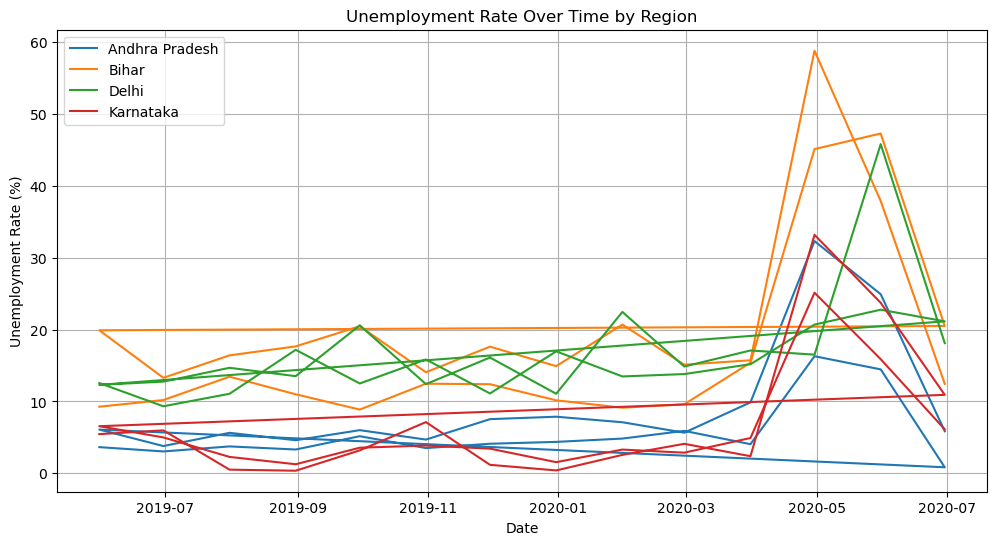

In [31]:
# Visualize the unemployment rate over time for a few regions to observe the COVID-19 impact

import matplotlib.pyplot as plt
import seaborn as sns

# Plot unemployment rate over time for selected regions
selected_regions = ['Andhra Pradesh', 'Bihar', 'Delhi', 'Karnataka']
plt.figure(figsize=(12, 6))
for region in selected_regions:
    region_data = df[df['Region'] == region]
    plt.plot(region_data['Date'], region_data['Unemployment_Rate'], label=region)
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

### Bar Chart of Average Unemployment Rate by Region

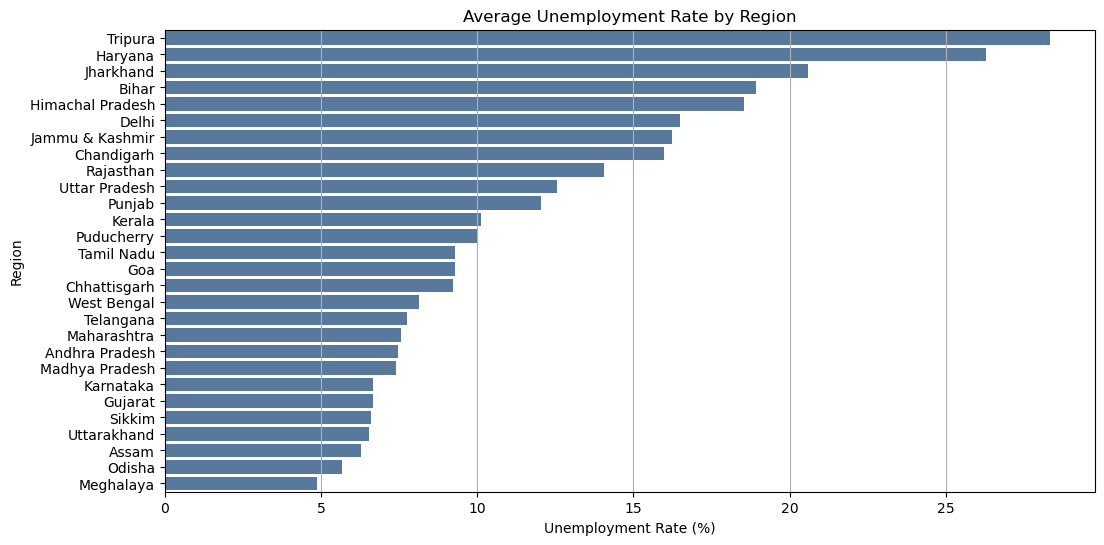

In [43]:
# Bar chart to compare average unemployment rates across regions


import seaborn as sns
import matplotlib.pyplot as plt

region_area_stats = df.groupby(['Region', 'Area'])['Unemployment_Rate'].mean().reset_index()

# Aggregate by Region (averaging across Rural and Urban if needed)
region_stats = region_area_stats.groupby('Region')['Unemployment_Rate'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Unemployment_Rate', y='Region', data=region_stats.sort_values('Unemployment_Rate', ascending=False), color='#4e79a7')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Region')
plt.grid(True, axis='x')
plt.show()

### Rural vs. Urban Comparison

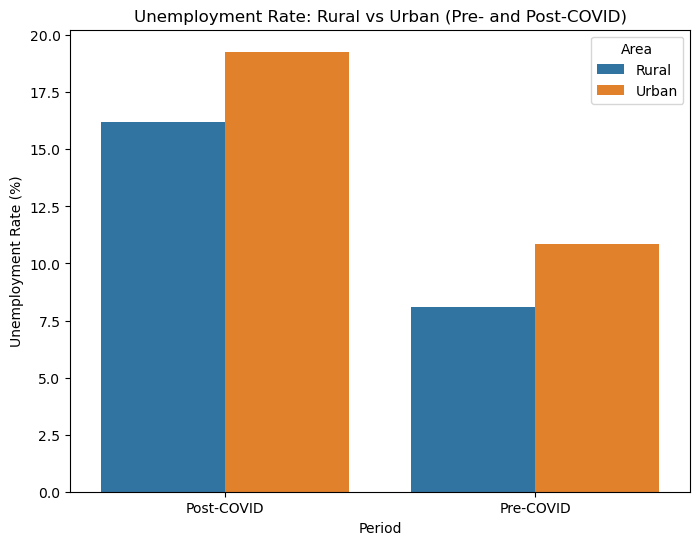

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Period', y='Unemployment_Rate', hue='Area', data=covid_impact)
plt.title('Unemployment Rate: Rural vs Urban (Pre- and Post-COVID)')
plt.xlabel('Period')
plt.ylabel('Unemployment Rate (%)')
plt.show()

# Analyze COVID-19 Impact
### Peak Unemployment During Lockdown

In [59]:
lockdown_period = df[df['Date'].between('2020-04-01', '2020-05-31')]
high_unemployment = lockdown_period.groupby(['Region', 'Area'])['Unemployment_Rate'].max().sort_values(ascending=False)
print("Top 10 Regions with Highest Unemployment Rates (April-May 2020):")
print(high_unemployment.head(10))

Top 10 Regions with Highest Unemployment Rates (April-May 2020):
Region            Area 
Puducherry        Urban    76.74
                  Rural    74.51
Jharkhand         Urban    70.17
Bihar             Urban    58.77
Jharkhand         Rural    55.10
Tamil Nadu        Rural    53.19
Himachal Pradesh  Urban    50.00
Bihar             Rural    47.26
Haryana           Urban    46.89
Delhi             Urban    45.78
Name: Unemployment_Rate, dtype: float64


### Recovery Analysis0))

In [64]:
# Check unemployment rates in June 2020 to assess recovery

recovery_data = df[df['Date'] == '2020-06-30']
print("Unemployment Rates in June 2020 by Region and Area:")
print(recovery_data[['Region', 'Area', 'Unemployment_Rate']].sort_values(by='Unemployment_Rate', ascending=False).head(10))

Unemployment Rates in June 2020 by Region and Area:
           Region   Area  Unemployment_Rate
107       Haryana  Rural              35.57
494       Haryana  Urban              29.41
174        Kerala  Rural              27.66
711       Tripura  Urban              27.47
440  Chhattisgarh  Urban              27.07
683    Tamil Nadu  Urban              24.93
146     Jharkhand  Rural              21.53
67          Delhi  Rural              21.14
39          Bihar  Rural              20.49
256        Punjab  Rural              20.00


# Insights and Conclusions

#### 1.Overall Impact of COVID-19 on Unemployment
Pre-COVID Baseline: Before March 2020, the average unemployment rate across India was relatively stable, with rural areas at 8.09% and urban areas at 10.84%. This suggests that urban areas already faced slightly higher unemployment challenges, likely due to higher competition for jobs and reliance on formal employment sectors.
Post-COVID Surge: Post-COVID (March 2020 onward), unemployment rates spiked significantly, reaching 16.18% in rural areas and 19.28% in urban areas. This doubling of rates reflects the severe economic disruption caused by the nationwide lockdown, which halted industries, services, and informal labor markets.

#### 2.Regional Disparities in Unemployment Rates
Highest Average Unemployment Rates:
Tripura (Rural: 27.17%, Urban: 29.53%) and Haryana (Rural: 25.01%, Urban: 27.55%) consistently had the highest unemployment rates across the entire period, indicating structural economic challenges in these regions, even before COVID-19.
Jharkhand (Urban: 25.95%) and Himachal Pradesh (Urban: 21.58%) also faced high unemployment, particularly in urban areas, suggesting that urban economies in these regions were more vulnerable to economic shocks.
Lowest Average Unemployment Rates:
Meghalaya (Rural: 2.48%) and Assam (Rural: 4.49%) had the lowest unemployment rates, likely due to a higher reliance on agriculture and less dependence on urban-centric industries that were heavily impacted by the lockdown.
States like Andhra Pradesh (Rural: 5.53%) and Gujarat (Rural: 5.92%) also maintained relatively low rates, indicating more resilient rural economies.

#### 3.Peak Unemployment During Lockdown (April-May 2020)
Extreme Spikes: The lockdown period saw unprecedented unemployment peaks, with Puducherry recording the highest rates (Urban: 76.74%, Rural: 74.51%), followed by Jharkhand (Urban: 70.17%, Rural: 55.10%) and Bihar (Urban: 58.77%, Rural: 47.26%).
Puducherry's exceptionally high rates may reflect its small size and heavy dependence on tourism and services, which were completely shut down during the lockdown.
Urban Vulnerability: Urban areas were disproportionately affected, as seen in the "Unemployment Rate Over Time by Region" plot, where Bihar, Delhi, and Andhra Pradesh (urban data inferred) show sharp increases in April 2020, peaking around 50-60%

#### 4.Rural vs. Urban Differences
Pre-COVID: Urban areas had a slightly higher unemployment rate (10.84%) compared to rural areas (8.09%), reflecting the competitive nature of urban job markets.
Post-COVID: The gap widened, with urban areas at 19.28% and rural areas at 16.18%. The "Unemployment Rate: Rural vs Urban (Pre- and Post-COVID)" bar chart clearly shows this disparity.
Urban areas were hit harder due to the closure of industries, retail, and services, which are more concentrated in cities.
Rural areas, while also affected, likely had a buffer from agricultural activities, which continued to some extent despite the lockdown.
Regional Variations: In states like Puducherry and Jharkhand, both rural and urban areas saw massive spikes, indicating that the lockdown's impact was widespread, but urban areas generally faced higher peaks (e.g., Jharkhand Urban: 70.17% vs. Rural: 55.10%).

#### 5.Recovery Trends by June 2020
Slow Recovery in Some Regions:
Haryana (Rural: 35.57%, Urban: 29.41%) and Tripura (Urban: 27.47%) continued to have high unemployment rates in June 2020, indicating a slower recovery. These regions likely faced ongoing challenges in restarting economic activities.
Kerala (Rural: 27.66%) and Chhattisgarh (Urban: 27.07%) also showed high rates, suggesting that states with significant service or migrant labor economies struggled to recover.
Strong Recovery in Other Regions:
The "Unemployment Rate Over Time by Region" plot shows that regions like Andhra Pradesh and Karnataka saw a sharp decline in unemployment rates after the April-May 2020 peak, dropping closer to pre-COVID levels by June 2020.
Andhra Pradesh (Rural: 0.85%) and Gujarat (Rural: 1.41%) exhibited strong recovery, possibly due to effective reopening of agricultural and industrial activities.